<h1><b>Self-Organizing Maps (SOM)</b></h1>

Στην άσκηση αυτή θα μελετήσετε μία εφαρμογή των <i>Self-Organizing Maps</i> \(<i>SOM</i>) για τη συμπίεση εικόνων. Ως είσοδο θα χρησιμοποιήσετε τη φωτογραφία του διάσημου τενίστα <i>Rafael Nadal</i> (<a href="https://github.com/nkostopoulos/StochasticsLabPublic/tree/master/lab2/nadal.jpg">nadal.jpg</a>). Η άσκηση αυτή βασίστηκε στον κώδικα που παρέχεται <a href=https://github.com/JustGlowing/minisom/blob/master/examples/ColorQuantization.ipynb>εδώ</a>.

<font color='#486393'>Οι απαντήσεις στα ερωτήματα γράφονται σε αυτό το χρώμα, προκειμένου να διαφοροποιούνται από την εκφώνηση της άσκησης. Σημειώνεται, επίσης, ότι κάποιες από τις αρχικές εντολές έχουν γίνει commented out, για λόγους εμφάνισης και συντομίας.</font>

<h3><b>Κώδικας</b></h3>

Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.020715477671136052


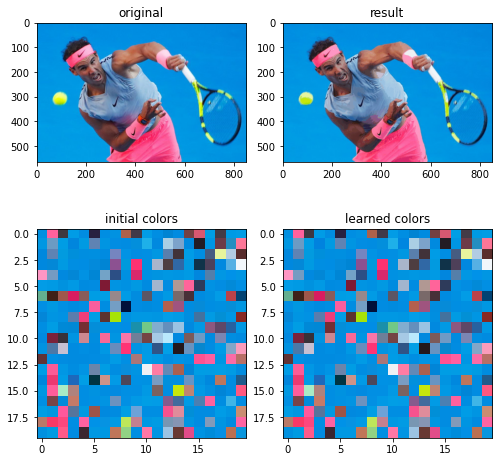

In [1]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore") # <- Προκύπτει ένα RuntimeWarning κατά την εκπαίδευση

image_name = 'nadal.jpg'
# read the image and return the RGB values for each pixel
img = plt.imread(image_name)

# reshaping the pixels matrix between 0 and 1
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

def CustomSOM(img, pixels, size, epochs, verb, print_fig, print_colors):

    # SOM initialization and training
    if verb: print('Training SOM...')
    som = MiniSom(size, size, 3, learning_rate=0.05, neighborhood_function='bubble')
    som.random_weights_init(pixels)
    starting_weights = som.get_weights().copy()  # saving the starting weights
    som.train(pixels, epochs, random_order=True, verbose=verb)
    
    qnt_error = som.quantization_error(pixels)

    #print('quantization...')
    qnt = som.quantization(pixels)  # quantize each pixels of the image
    clustered = np.zeros(img.shape)
    for i, q in enumerate(qnt):  # place the quantized values into a new image
        clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

    if print_fig:
        # show the result
        plt.figure(figsize=(7, 7))
        plt.figure(1)
        plt.subplot(221)
        plt.title('original')
        plt.imshow(img)
        plt.subplot(222)
        plt.title('result')
        plt.imshow(clustered)

    if print_colors:
        plt.subplot(223)
        plt.title('initial colors')
        plt.imshow(starting_weights, interpolation='none')
        plt.subplot(224)
        plt.title('learned colors')
        plt.imshow(som.get_weights(), interpolation='none')

        plt.tight_layout()
        plt.show()
        
    return qnt_error, som

qnt, model = CustomSOM(img,pixels,20,10000,True,True,True)

<h3><b>Ερωτήσεις</b><h3>
<ul>
<li>Να περιγράψετε συνοπτικά τη λειτουργία των <i>SOM</i>.</li>
<li>Να αναφέρετε ενδεικτικές εφαρμογές των <i>SOM</i>.</li>
<li>Με τη βοήθεια της εκφώνησης και του διαθέσιμου κώδικα να περιγράψετε συνοπτικά τη λογική με την οποία πραγματοποιείται η συμπίεση των εικόνων της άσκησης.</li>
<li>Να τρέξετε τον κώδικα με μέγεθος πλέγματος 2x2 αρκετές φορές. Τι παρατηρείτε σχετικά με τη διακύμανση των τιμών του σφάλματος κβάντισης; Να αιτιολογήσετε γιατί συμβαίνει αυτό εξετάζοντας τον κώδικα της άσκησης.</li>
<li>Να τρέξετε τον κώδικα της άσκησης για μεγέθη πλέγματος <i>SOM</i> 2x2, 3x3, 4x4, ..., 15x15, διατηρώντας το πλέγμα τετραγωνικό. Να σχεδιάσετε σε ένα γράφημα τις τιμές του σφάλματος κβάντισης. Τι παρατηρείτε σχετικά με την εξέλιξη της τιμής του σφάλματος κβάντισης, καθώς αυξάνεται το μέγεθος του πλέγματος;</li>
<li>Βασισμένοι στα αποτελέσματα των προηγούμενων ερωτημάτων να επιλέξετε, κατά προσέγγιση, το κατάλληλο μέγεθος πλέγματος που προσφέρει μία ικανοποιητική ανακατασκευή της αρχικής εικόνας, δηλαδή επιστρέφει αποδεκτό σφάλμα κβάντισης και αποδεκτό μέγεθος συμπίεσης.
</li>
<li>Να εφαρμόσετε το SOM grid που λάβατε στα προηγούμενα ερωτήματα για μία άλλη εικόνα του Nadal (<a href="https://github.com/nkostopoulos/StochasticsLabPublic/tree/master/lab2/nadal2.jpg">nadal2.jpg</a>), που προέρχεται από τον ίδιο αγώνα. Η εικόνα αυτή έχει περίπου το ίδιο μέγεθος με την αρχική εικόνα. Τι παρατηρείτε; Στην περίπτωση που δίνατε ως είσοδο στο SOM έναν άλλο τενίστα, θα είχατε το ίδιο καλά αποτελέσματα;</li>
</ul>

### Απαντήσεις

- <font color='#486393'>Τα SOM χρησιμοποιούνται για την ανάλυση και επεξεργασία υψηλοδιάστατων δεδομένων, όπως είναι οι εικόνες, απεικονίζοντάς τα σε χώρους χαμηλότερων διαστάσεων. Αυτό που τα διαχωρίζει από άλλες μεθόδους διαστατικής μείωσης είναι το γεγονός πως η απεικόνιση είναι εν γένει μη γραμμική (σε αντίθεση, για παράδειγμα, με την PCA) και διατηρεί την τοπολογική δομή των δεδομένων. Πιο συγκεκριμένα, ένα SOM αποτελείται από μια διατεταγμένη συστοιχία νευρώνων (για παράδειγμα ένα πλέγμα) οι οποίοι εκπαιδεύονται με τρόπο ανταγωνιστικό: δεδομένων κάποιων αρχικοποιημένων τιμών για τα συναπτικά βάρη, η ανανέωση των βαρών σε κάθε βήμα εκπαίδευσης πραγματοποιείται μόνο για τη γειτονιά εκείνου του νευρώνα που βρίσκεται πιο «κοντά» (βάσει κάποιου μέτρου απόστασης) στο input του βήματος αυτού. Η γειτονιά του νευρώνα που βρίσκεται πιο κοντά στο input ορίζεται μέσω κάποιας συνάρτησης (για παράδειγμα Γκαουσιανής) και με τον τρόπο αυτό εξασφαλίζεται πως η εισαγωγή όμοιων μεταξύ τους προτύπων στο SOM θα οδηγεί στην ενεργοποίηση συστάδων γειτονικών μεταξύ τους νευρώνων.</font>

- <font color='#486393'>Σε ό,τι αφορά τις εφαρμογές των SOM, ορισμένες ενδεικτικές είναι οι ακόλουθες:</font><br>
  <font color='#486393'>[1] Όπως και η PCA, τα SOM μπορούν να αξιοποιηθούν για feature extraction μέσω της επιλογής κυρίαρχων χαρακτηριστικών σε πολυδιάστατα δείγματα, αφού στη βάση τους αποτελούν μια μέθοδο μείωσης της διαστατικότητας.</font><br>
  <font color='#486393'>[2] Τα SOM μπορούν επιπλέον να χρησιμοποιηθούν σε προβλήματα συσταδοποίησης (clustering), συνήθως ως αρχικό στάδιο πριν την εφαρμογή άλλων αλγορίθμων συσταδοποίησης.</font><br>
  <font color='#486393'>[3] Μια ακόμη περιοχή στην οποία μπορούν να βρουν εφαρμογή - αν και όχι με την επιτυχία που σημειώνουν άλλα μοντέλα - είναι η ταξινόμηση, εάν κανείς πραγματοποιήσει μια αντιστοιχία μεταξύ συστάδων από νευρώνες που ενεργοποιούνται και κατηγοριών ταξινόμησης.</font><br>
  <font color='#486393'>[4] Επιπροσθέτως, δεδομένου πως οι νευρώνες ενός εκπαιδευμένου SOM αντιστοιχούν σε μια κατανομή πιθανότητας που αποτελεί αποτύπωμα των δεδομένων που χρησιμοποιήθηκαν για την εκπαίδευση, το εκπαιδευμένο SOM μπορεί να αξιοποιηθεί για δειγματοληψία από το δείγμα εκπαίδευσης ή για εντοπισμό έκτοπων τιμών (outliers).</font><br>
  <font color='#486393'>[5] Αξίζει, επιπλέον, να αναφερθεί πως τα SOM μπορούν να πραγματοποιήσουν ordering των δεδομένων εκπαίδευσης βάσει κάποιου κριτηρίου, χάρη στο γεγονός πως διατηρούν την τοπολογική δομή τους. Χαρακτηριστικό παράδειγμα αποτελεί η εφαρμογή 1-διάστατων SOM για την επίλυση του προβλήματος του περιπλανώμενου πωλητή.</font><br>
  <font color='#486393'>[6] Τέλος, μια πολύ χαρακτηριστική εφαρμογή των SOM, και μάλιστα αυτή που παρουσιάζεται στο παρόν notebook, είναι η συμπίεση αρχείων (π.χ. εικόνων) μέσω εντοπισμού παρόμοιων υποπεριοχών στο δείγμα.</font><br>

- <font color='#486393'>Στα πλαίσια της παρούσας άσκησης, μια εικόνα χρησιμοποιείται για την εκπαίδευση ενός SOM, το οποίο πραγματοποιεί κβάντωση (quantization) των χρωμάτων της εικόνας προκειμένου να αποκτήσει ένα μικρότερο σύνολο χρωμάτων. Χρησιμοποιώντας το νέο, μικρότερο αυτό σύνολο, το SOM απεικονίζει την εικόνα εκ νέου, συσταδοποιώντας περιοχές με παρόμοιες αποχρώσεις οι οποίες δε διακρίνονται πλέον ως διαφορετικά χρώματα. Έτσι, γειτονιές οι οποίες στην αρχική εικόνα περιγράφονταν από διαφορετικές αποχρώσεις, απεικονίζονται τώρα μέσω του SOM σε γειτονιές με μικρότερο αριθμό αποχρώσεων (ενδεχομένως και μία μοναδική απόχρωση) και μειώνοντας έτσι πρακτικά την ανάλυση (resolution) της εικόνας.</font>

- <font color='#486393'>Η διάσταση των πλεγμάτων αντιστοιχεί στο πλήθος των διαφορετικών αποχρώσεων που καλείται να μάθει το SOM: όσο μικρότερο το μέγεθος του πλέγματος, τόσο μικρότερο και το σύνολο των χρωμάτων που μαθαίνονται από το SOM. Επιλέγοντας 2x2 πλέγματα, τα αποτελέσματα για το σφάλμα κβάντωσης (quantization error) τρέχοντας τον αλγόριθμο αρκετές φορές απεικονίζονται παρακάτω:</font>

*******************************************************
Repetition No. 1.
*******************************************************
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.19261203749056685


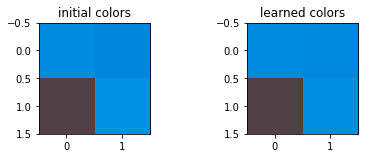

*******************************************************
Repetition No. 2.
*******************************************************
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.1471729158175393


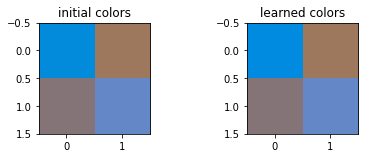

*******************************************************
Repetition No. 3.
*******************************************************
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.21282796022514533


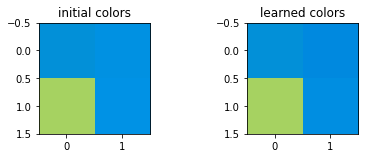

*******************************************************
Repetition No. 4.
*******************************************************
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.20752403839102018


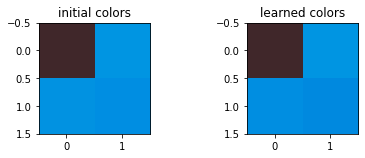

*******************************************************
Repetition No. 5.
*******************************************************
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.18031018823303974


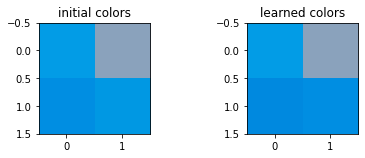

*******************************************************
Repetition No. 6.
*******************************************************
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.14526733646624856


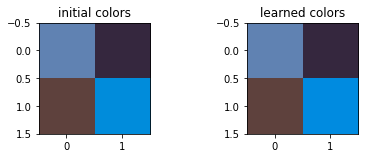

*******************************************************
Repetition No. 7.
*******************************************************
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.19798067910136982


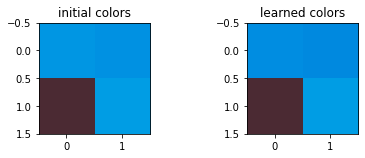

*******************************************************
Repetition No. 8.
*******************************************************
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.15209988712653216


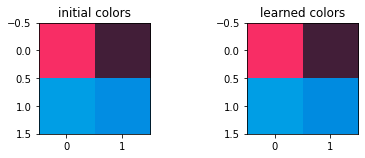

*******************************************************
Repetition No. 9.
*******************************************************
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.28387881015616


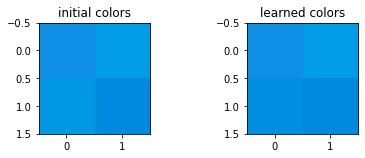

*******************************************************
Repetition No. 10.
*******************************************************
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.19186547179255659


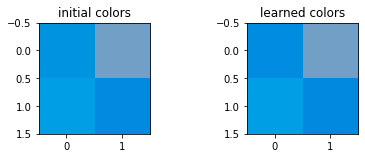

In [2]:
reps = 10 # <- Πόσες φορές να τρέξει ο αλγόριθμος για να συγκριθούν τα διαφορετικά αποτελέσματα για το quantization error
for rep in range(reps):
    print(55*"*"+"\n"+f"Repetition No. {rep+1}.\n"+55*"*")
    qnt, model = CustomSOM(img,pixels,2,10000,True,False,True)

<font color='#486393'>Η προφανής παρατήρηση είναι πως το σφάλμα κβάντωσης ποικίλλει: Στις επαναλήψεις 5 και 10 το σφάλμα είναι παρόμοιο και είναι περίπου ίσο με 0.19, ενώ σε άλλες περιπτώσεις το σφάλμα είναι διαφορετικό. Ο λόγος για αυτό γίνεται εμφανής εάν κανείς απεικονίσει τα χρώματα που έμαθε το SOM σε κάθε περίπτωση. Με 2x2 πλέγματα οι επιλογές είναι πάρα πολύ περιορισμένες ως προς το πλήθος των προς εκμάθηση χρωμάτων. Έτσι, ανάλογα με το εάν το SOM θα εκπαιδευτεί για να αναγνωρίζει αποχρώσεις του μπλε ή για να αναγνωρίζει, για παράδειγμα, το μπλε και το ροζ, η τελική αναπαράσταση της εικόνας θα είναι πολύ διαφορετική. Ως εκ τούτου, διαφορετικό θα είναι και το σφάλμα κβάντωσης, το οποίο εξάλλου δεν είναι παρά ένα μέτρο της πληροφορίας που απουσιάζει από το τελικό output λόγω της δράσης του SOM, σε σχέση με την αρχική εικόνα.</font>

- <font color='#486393'>Τρέχοντας τον αντίστοιχο κώδικα για ίδιο πλήθος εποχών για διαφορετικά μεγέθη του grid, προκύπτουν τα ακόλουθα:</font>

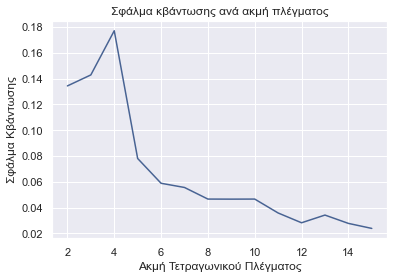

In [3]:
qnt_list, models = [], {}
reps = range(2,16)
for rep in reps:
    qnt, model = CustomSOM(img,pixels,rep,10000,False,False,False)
    models[rep] = model
    qnt_list.append(qnt)
    
import seaborn as sns
sns.set(style = "darkgrid") # καθαρά αισθητικοί λόγοι

mycol = (72/255, 99/255, 147/255)

fig, ax = plt.subplots()

ax.plot(reps, qnt_list, color=mycol)
ax.set_xlabel('Ακμή Τετραγωνικού Πλέγματος')
ax.set_ylabel('Σφάλμα Κβάντωσης')
ax.set_title('Σφάλμα κβάντωσης ανά ακμή πλέγματος')
plt.show()

<font color='#486393'>Όπως είναι αναμενόμενο, όσο αυξάνεται το μέγεθος του πλέγματος (από την τιμή 4 και μετά), τόσο μειώνεται το σφάλμα κβάντωσης, αφού τόσο υψηλότερο είναι το πλήθος των διαφορετικών αποχρώσεων που επιτρέπεται στο SOM να μάθει (οι πρώτες τιμές έχουν μεγάλη διακύμανση στην τιμή του σφάλματος κβάντωσης για τους λόγους που αναλύθηκαν στο προηγούμενο ερώτημα). Εντούτοις, ζητούμενο δεν είναι μόνο η επιλογή της κατάλληλης τιμής για την ακμή του πλέγματος προκειμένου το σφάλμα κβάντωσης να είναι όσο το δυνατό μικρότερο, αλλά και η συμπίεση της εικόνας να είναι όσο το δυνατό υψηλότερη. Η επιλογή κατάλληλης ακμής πλέγματος θυμίζει την επιλογή κατάλληλου $k$ στον αλγόριθμο k-Means, αφού κι εκεί ζητούμενη είναι η εύρεση ενός πλήθους συστάδων που να οδηγεί στο ελάχιστο σφάλμα συσταδοποίησης, χωρίς όμως να τείνει στην τετριμμένη περίπτωση όπου κάθε δειγματικό σημείο αποτελεί και μια συστάδα. Έτσι, θα μπορούσαν να αξιοποιηθούν αντίστοιχες μέθοδοι, όπως η Elbow. Στην προκείμενη περίπτωση, η μέθοδος αυτή θα έδινε ένα σχετικά μικρό αριθμό για την ακμή του πλέγματος, οπότε αντ' αυτού επιλέγεται η τιμή 12. Η επιλογή αυτή βασίζεται στο γεγονός πως για την τιμή αυτή το σφάλμα κβάντωσης είναι ήδη αρκετά μικρό, ενώ από εκεί και έπειτα φαίνεται να μη μειώνεται με υψηλό ρυθμό (παρουσιάζεται μάλιστα μια πολύ μικρή αύξηση στην τιμή 13).</font>

- <font color='#486393'>Βάσει των παραπάνω, η ανακατασκευασμένη εικόνα για το 7x7 πλέγμα φαίνεται ακολούθως.</font>

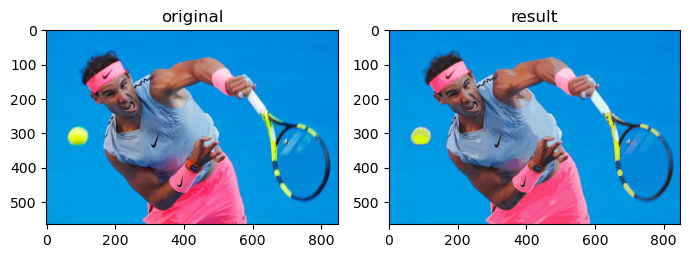

In [4]:
matplotlib.rc_file_defaults()
best_model = 12

def PrintSOM(som,img,pixels):
    qnt = som.quantization(pixels)  # quantize each pixels of the image
    clustered = np.zeros(img.shape)
    for i, q in enumerate(qnt):  # place the quantized values into a new image
        clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

    # show the result
    plt.figure(figsize=(7, 7))
    plt.figure(1)
    plt.subplot(221)
    plt.title('original')
    plt.imshow(img)
    plt.subplot(222)
    plt.title('result')
    plt.imshow(clustered)

    plt.tight_layout()
    plt.show()
        
PrintSOM(models[best_model],img,pixels)

- <font color='#486393'>Εφαρμόζοντας το SOM που εκπαιδεύτηκε στην πρώτη εικόνα του Ναδάλ για τη δεύτερη εικόνα, προκύπτει η ακόλουθη απεικόνιση:</font>

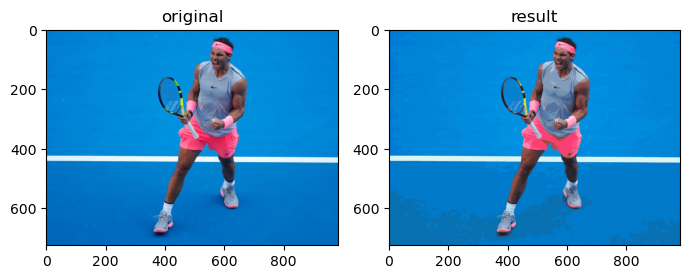

In [5]:
img2 = plt.imread('nadal2.jpg')
pixels2 = np.reshape(img2, (img2.shape[0]*img2.shape[1], 3)) / 255.

PrintSOM(models[best_model],img2,pixels2)

<font color='#486393'>Προφανώς, το εκπαιδευμένο μοντέλο πραγματοποιεί μια ικανοποιητική απεικόνιση και για τη δεύτερη εικόνα. Τονίζεται εδώ πως σημασία δεν έχει ο τενίστας που απεικονίζεται (εδώ ο Ναδάλ), όσο τα χρώματα της αρχικής εικόνας πάνω στα οποία πραγματοποίησε το SOM την κβάντωση. Όπως φαίνεται παρακάτω, εφαρμόζοντας το εκπαιδευμένο SOM σε μια διαφορετική εικόνα του Ναδάλ (extra_nadal.jpg), από κάποια άλλη του εμφάνιση, η απεικόνιση δεν είναι τόσο ικανοποιητική.</font>

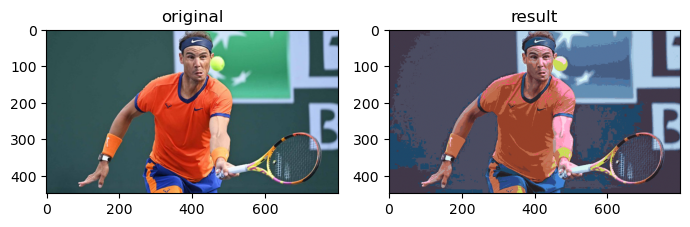

In [6]:
img3 = plt.imread('extra_nadal.jpg')
pixels3 = np.reshape(img3, (img3.shape[0]*img3.shape[1], 3)) / 255.

PrintSOM(models[best_model],img3,pixels3)

<font color='#486393'>Αντιθέτως, εφαρμόζοντας το SOM σε μια εικόνα του Federer (federer.jpg) με χρώματα συγγενικά αυτών που έμαθε το SOM κατά την εκπαίδευσή του, τα αποτελέσματα είναι καλύτερα σε σχέση με τα αντίστοιχα στην τελευταία φωτογραφία του Ναδάλ.</font>

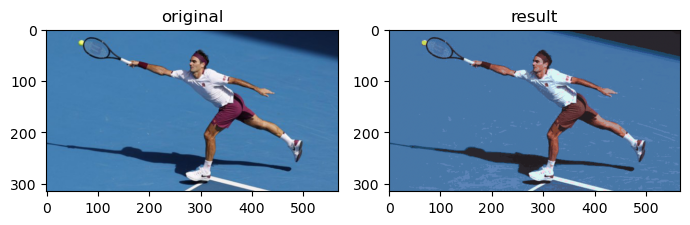

In [7]:
img4 = plt.imread('federer.jpg')
pixels4 = np.reshape(img4, (img4.shape[0]*img4.shape[1], 3)) / 255.

PrintSOM(models[best_model],img4,pixels4)